<a href="https://colab.research.google.com/github/NauticalNerd95/Anemia-Detection-and-Screening/blob/main/Anemia_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Based Anemia Screening from Hematological Data**

**This project developed a machine learning system for anemia screening using hematological data. It addresses device-specific variations in Cell Blood Count (CBC) parameters through meticulous data processing, enhancing the accuracy and reliability of anemia detection.**



---



# Data Selection

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing
import numpy as np

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/finalyear_PROJ/CBC_dataset.csv"
df = pd.read_csv(path)

#view our dataset
df.head(10)

,ID,Gender,DevTyp,WBC,LYMp,MONp,NEUp,EOSp,BASOp,LYMn,...,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR,PLCC
0,1,1,1,10.29,41.01,7.52,44.29,6.78,0.40,4.220,...,27.8,38.0,41.4,11.5,374.0,6.5,5.0,0.24,7.57,28.0
1,2,1,1,15.47,72.64,4.04,20.72,1.98,0.62,11.237,...,18.6,28.0,50.6,16.8,177.0,9.3,30.0,0.17,68.76,122.0
2,3,1,2,47.18,77.58,1.53,13.91,6.71,0.27,36.600,...,27.5,30.8,47.5,13.3,221.7,8.9,18.9,0.20,409.00,NaN
3,4,0,2,4.45,20.44,19.67,44.91,14.49,0.49,0.910,...,29.7,34.1,48.8,14.0,126.3,11.1,18.7,0.14,61.90,NaN
4,5,1,1,4.55,45.35,8.32,44.69,1.10,0.54,2.063,...,27.4,30.0,57.5,16.6,46.0,8.5,6.1,0.04,29.16,13.0
5,6,0,2,6.67,35.60,6.49,255.69,0.13,0.09,2.370,...,31.0,34.0,64.6,17.7,202.9,9.1,18.9,0.18,42.10,NaN
6,7,0,1,3.58,48.76,5.06,44.80,0.88,0.50,1.746,...,23.0,30.0,44.8,15.2,81.0,7.4,30.0,0.06,69.10,56.0
7,8,0,1,2.71,45.46,13.77,33.06,7.26,0.45,1.232,...,26.4,30.0,43.7,12.8,107.0,8.1,6.1,0.09,22.03,24.0
8,9,1,2,11.23,93.16,1.75,4.36,0.38,0.35,10.460,...,20.2,27.6,60.1,20.5,169.5,12.6,15.5,0.21,75.40,NaN
9,10,0,2,25.78,3.17,10.23,84.27,2.19,0.14,0.820,...,28.7,35.9,14.3,45.7,182.3,11.0,19.6,0.20,58.80,NaN


In [ ]:
df.shape

(300, 28)

# Preprocessing and Transformation

In [ ]:
df.sample(4)

,ID,Gender,DevTyp,WBC,LYMp,MONp,NEUp,EOSp,BASOp,LYMn,...,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR,PLCC
135,136,0,1,7.76,38.32,6.69,45.83,8.70,0.46,2.974,...,26.9,31.0,40.2,12.0,204.0,8.7,6.8,0.18,20.14,41.0
193,194,0,2,8.01,10.12,6.08,81.85,1.57,0.38,0.810,...,33.0,33.2,126.3,31.8,197.9,9.0,19.2,0.18,40.40,NaN
83,84,0,1,6.84,27.56,4.47,64.41,3.28,0.28,1.885,...,25.7,31.0,63.2,13.2,264.0,7.1,6.1,0.19,43.76,116.0
140,141,0,1,48.23,55.85,31.90,12.03,0.12,0.10,26.936,...,33.9,30.0,61.0,13.7,35.0,8.8,4.3,0.03,28.07,10.0


In [ ]:
df.describe()

,ID,Gender,DevTyp,WBC,LYMp,MONp,NEUp,EOSp,BASOp,LYMn,...,HGB,MCV,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,296.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,296.000000,296.000000,296.000000
mean,150.500000,0.406667,1.686667,13.707267,32.561667,42.978867,53.430933,4.983967,0.484873,3.799236,...,15.403333,87.503733,28.888367,32.036000,53.111667,20.266000,246.963667,9.970034,15.040203,0.506993
std,86.746758,0.492032,0.464624,38.634616,17.855122,560.466201,22.516049,27.757340,0.886512,10.383248,...,70.151793,70.937352,25.886700,16.549849,26.899869,53.336865,166.593242,16.329297,6.595996,3.733525
min,1.000000,0.000000,1.000000,0.240000,2.040000,1.160000,0.710000,0.000000,0.000000,0.120000,...,3.680000,7.440000,12.300000,18.400000,4.100000,10.400000,4.100000,0.230000,4.000000,0.010000
25%,75.750000,0.000000,1.000000,5.585000,21.665000,6.205000,44.772500,0.887500,0.180000,1.407500,...,8.030000,73.400000,22.475000,28.975000,43.900000,13.175000,128.950000,7.900000,7.600000,0.120000
50%,150.500000,0.000000,2.000000,7.390000,30.695000,9.000000,53.735000,1.990000,0.300000,2.050500,...,10.400000,84.500000,26.700000,31.000000,48.300000,14.700000,226.150000,8.800000,17.400000,0.210000
75%,225.250000,1.000000,2.000000,10.267500,39.452500,12.340000,64.970000,4.172500,0.480000,2.812500,...,12.585000,91.725000,29.000000,33.025000,56.350000,18.325000,316.125000,9.525000,18.700000,0.292500
max,300.000000,1.000000,2.000000,484.000000,93.160000,9717.000000,255.690000,473.000000,8.480000,145.380000,...,1217.000000,1004.000000,290.000000,286.000000,414.000000,926.600000,1074.100000,274.000000,47.000000,60.900000


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
DevTyp,0
WBC,0
LYMp,0
MONp,0
NEUp,0
EOSp,0
BASOp,0
LYMn,4


We see here that the 'PLCC' column (Platelets Large Cell Count) has 207 null values. This is significantly a huge number and thus we should remove the column association with 'PLCC'.

In [ ]:
df = df.drop('PLCR', axis =1)

In [ ]:
df.sample(3)

,ID,Gender,DevTyp,WBC,LYMp,MONp,NEUp,EOSp,BASOp,LYMn,...,MCV,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR
291,292,1,2,2.96,29.06,12.65,43.33,14.81,0.15,0.860,...,85.2,26.70,31.3,47.0,13.8,111.2,8.8,16.6,0.10,40.40
88,89,0,1,2.32,38.33,4.07,56.44,0.63,0.53,0.889,...,89.4,27.20,30.0,41.4,11.8,135.0,10.5,9.4,0.14,33.09
86,87,0,1,5.35,37.81,9.25,50.20,2.30,0.44,2.023,...,70.7,19.71,28.0,56.3,22.4,264.0,6.7,5.4,0.18,50.12


In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
DevTyp,0
WBC,0
LYMp,0
MONp,0
NEUp,0
EOSp,0
BASOp,0
LYMn,4


We can also see that there are 4 missing values in 4 columns respectively, we can handle these null values by incorporating mean values of the column.

In [ ]:
df['DevTyp'].value_counts()

,count
DevTyp,
2,206
1,94


In [ ]:
newdf = df[df['DevTyp'] == 2]

In [ ]:
newdf.head(5)

,ID,Gender,DevTyp,WBC,LYMp,NEUp,EOSp,LYMn,MONn,NEUn,...,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR,PLCC,Anemic
2,3,1,2,47.18,77.58,13.91,6.71,36.60,0.72,6.56,...,30.8,47.5,13.3,221.7,8.9,18.9,0.20,409.0,NaN,0
3,4,0,2,4.45,20.44,44.91,14.49,0.91,0.88,2.00,...,34.1,48.8,14.0,126.3,11.1,18.7,0.14,61.9,NaN,1
5,6,0,2,6.67,35.60,255.69,0.13,2.37,0.43,3.72,...,34.0,64.6,17.7,202.9,9.1,18.9,0.18,42.1,NaN,0
8,9,1,2,11.23,93.16,4.36,0.38,10.46,0.20,0.49,...,27.6,60.1,20.5,169.5,12.6,15.5,0.21,75.4,NaN,0
9,10,0,2,25.78,3.17,84.27,2.19,0.82,2.64,21.72,...,35.9,14.3,45.7,182.3,11.0,19.6,0.20,58.8,NaN,1


Based on the WHO parameters for anemia diagonsis. we will perform feature engineering based on it.

In [ ]:
def define_anemia_criteria(row):
    """
    Defines anemia based on HGB, RBC, HCT, MCV, MCH, and MCHC
    for DevTyp 2 .
    """
    hgb = row['HGB']
    rbc = row['RBC']
    hct = row['HCT']
    mcv = row['MCV']
    mch = row['MCH']
    mchc = row['MCHC']

    anemia = 0  # Default: No anemia

    if (
        hgb < 12.00 and
        rbc < 3.76 and
        mcv < 90.0 and
        mch < 38.0

    ):
        anemia = 1

    return anemia

# Apply the function to create the 'Anemia' column
newdf['Anemic'] = newdf.apply(define_anemia_criteria, axis=1)

# Print the value counts of the 'Anemia' column
print(newdf['Anemic'].value_counts())

Anemic
0    158
1     48
Name: count, dtype: int64


# Exploratory Data Analysis

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 2 to 299
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      206 non-null    int64  
 1   Gender  206 non-null    int64  
 2   DevTyp  206 non-null    int64  
 3   WBC     206 non-null    float64
 4   LYMp    206 non-null    float64
 5   MONp    206 non-null    float64
 6   NEUp    206 non-null    float64
 7   EOSp    206 non-null    float64
 8   BASOp   206 non-null    float64
 9   LYMn    202 non-null    float64
 10  MONn    202 non-null    float64
 11  NEUn    202 non-null    float64
 12  EOSn    202 non-null    float64
 13  BASOn   202 non-null    float64
 14  RBC     206 non-null    float64
 15  HGB     206 non-null    float64
 16  HCT     206 non-null    object 
 17  MCV     206 non-null    float64
 18  MCH     206 non-null    float64
 19  MCHC    206 non-null    float64
 20  RDWSD   206 non-null    float64
 21  RDWCV   206 non-null    float64
 22  PLT    

Let's see how many people have anemia in the dataset. It will give an idea whether the data is balanced or imbalanced


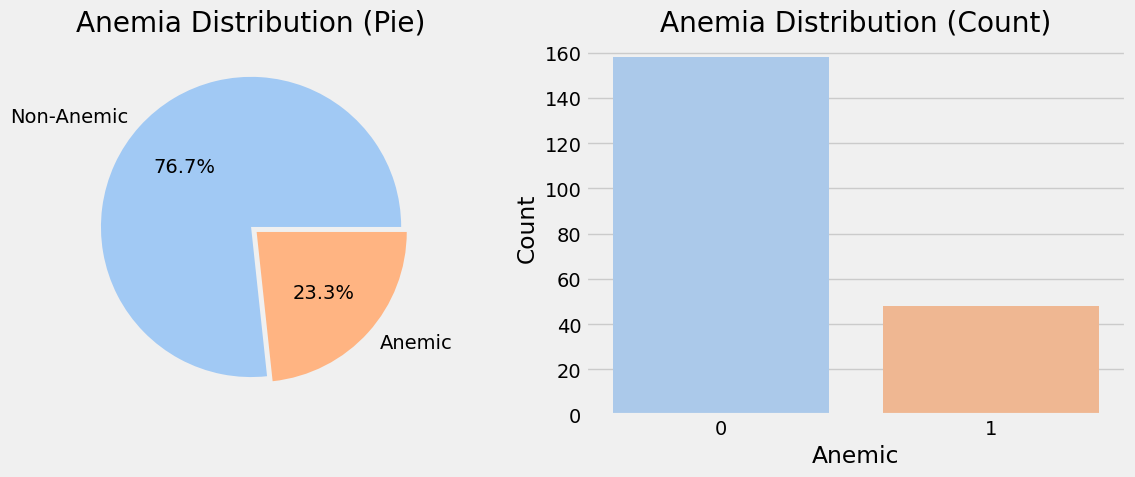

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted figure size

# Pie Chart
newdf['Anemic'].value_counts().plot.pie(
    ax=axes[0],
    autopct='%1.1f%%',
    explode=[0, 0.05],  # Subtle explode
    labels=['Non-Anemic', 'Anemic'],
    shadow=False,  # Removed shadow for cleaner look
    colors=sns.color_palette('pastel')  # Pastel colors
)
axes[0].set_title('Anemia Distribution (Pie)')
axes[0].set_ylabel('')
sns.countplot(
    x='Anemic',
    data=newdf,
    ax=axes[1],
    palette='pastel'  # Consistent color palette
)
axes[1].set_title('Anemia Distribution (Count)')
axes[1].set_xlabel('Anemic')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
newdf.groupby(['Gender','Anemic'])['Anemic'].count()

Gender  Anemic
0       0         92
        1         22
1       0         66
        1         26
Name: Anemic, dtype: int64

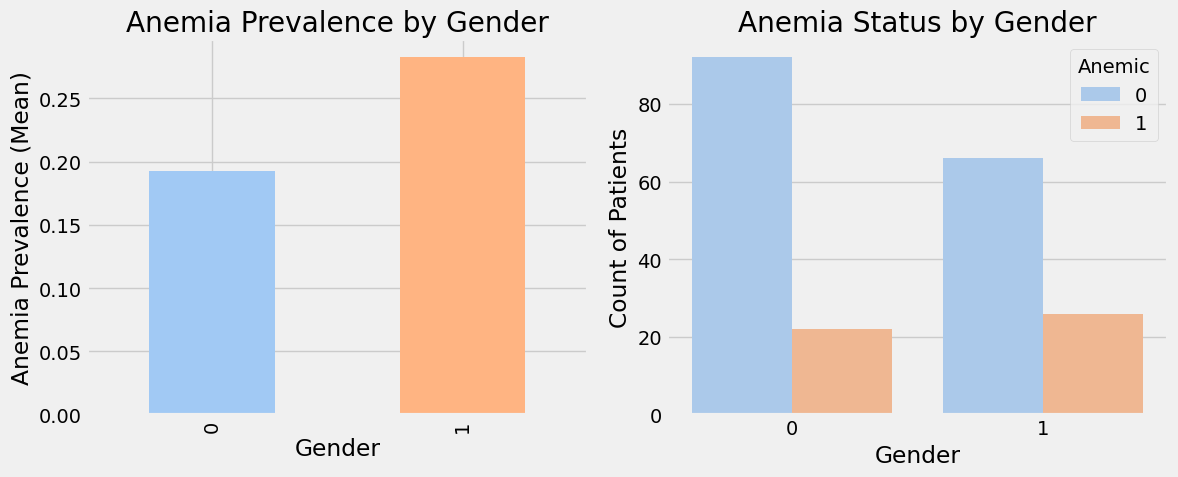

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted figure size
newdf.groupby('Gender')['Anemic'].mean().plot.bar(ax=axes[0], color=sns.color_palette('pastel'))
axes[0].set_title('Anemia Prevalence by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Anemia Prevalence (Mean)')
sns.countplot(
    x='Gender',
    hue='Anemic',
    data=newdf,
    ax=axes[1],
    palette='pastel'
)
axes[1].set_title('Anemia Status by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count of Patients')
plt.tight_layout()
plt.show()

Continious Feature: Hemoglobin

In [ ]:
print('The highest hemoglobin was of:',newdf['HGB'].max())
print('The lowest hemoglobin was of:',newdf['HGB'].min())
print('The average hemoglobin in the data:',newdf['HGB'].mean())

The highest hemoglobin was of: 60.7
The lowest hemoglobin was of: 3.68
The average hemoglobin in the data: 10.348009708737866


*📌 Lower than normal hemoglobin levels indicate anemia. The normal hemoglobin range is generally defined as 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 11.6 to 15 g/dL for women*



Continious Feature: MCH (Mean Corpuscular Hemoglobin)


In [ ]:
# See the min, max, mean values
print('The highest MCH was of:',newdf['MCH'].max())
print('The lowest MCH was of:', newdf['MCH'].min())
print('The average MCH in the data:',newdf['MCH'].mean())

The highest MCH was of: 247.0
The lowest MCH was of: 12.3
The average MCH in the data: 27.80679611650485


*📌 MCH stands for “mean corpuscular hemoglobin.” An MCH value refers to the average quantity of hemoglobin present in a single red blood cell. Hemoglobin is the protein in your red blood cells that transports oxygen to the tissues of your body*

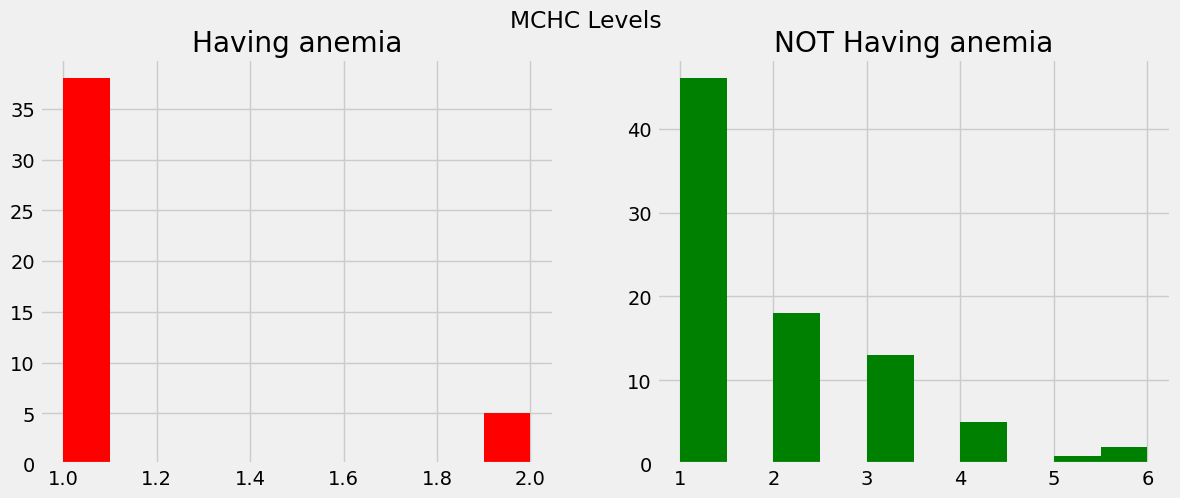

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=newdf[newdf['Anemic']==1]['MCHC'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=newdf[newdf['Anemic']==0]['MCHC'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCHC Levels')
plt.show()

# Feature Engineering and Data Cleaning

Since we are handling our dataset using the references of Mean Corpusul values and Hemoglobin concentration, we can safely drop the columnns that are not assisting in our project objective

In [ ]:
newdf.columns

Index(['ID', 'Gender', 'DevTyp', 'WBC', 'LYMp', 'MONp', 'NEUp', 'EOSp',
       'BASOp', 'LYMn', 'MONn', 'NEUn', 'EOSn', 'BASOn', 'RBC', 'HGB', 'HCT',
       'MCV', 'MCH', 'MCHC', 'RDWSD', 'RDWCV', 'PLT', 'MPV', 'PDW', 'PCT',
       'Anemia', 'Anemic'],
      dtype='object')

In [ ]:
newdf = newdf.drop('BASOp', axis =1)


In [ ]:
'LYMn','NEUn','EOSn','BASOn','Anemia','MONp','RDWSD',

('LYMn', 'NEUn', 'EOSn', 'BASOn', 'Anemia', 'MONp', 'RDWSD')

In [ ]:
newdf = newdf.drop('EOSn', axis =1)


In [ ]:
newdf = newdf.drop('MONp', axis =1)


In [ ]:
newdf = newdf.drop('RDWCV', axis =1)


In [ ]:
newdf = newdf.drop('NEUn', axis =1)


In [ ]:
newdf.sample(5)

,ID,Gender,DevTyp,WBC,LYMp,NEUp,EOSp,LYMn,MONn,BASOn,...,HGB,HCT,MCV,MCH,MCHC,PLT,MPV,PDW,PCT,Anemic
25,26,0,2,5.91,38.77,50.07,0.70,2.29,0.61,0.01,...,14.47,45.7,92.7,29.4,31.7,236.8,10.0,20.1,0.24,0
174,175,0,2,25.10,5.84,89.28,1.33,1.47,0.84,0.06,...,9.79,28.6,62.4,21.4,34.2,270.5,8.9,19.2,0.24,0
48,49,1,2,0.69,50.53,31.33,0.34,0.35,0.10,0.02,...,9.65,32.7,80.7,23.8,29.5,175.5,9.3,18.0,0.16,0
62,63,0,2,27.70,66.16,21.73,3.05,33.76,4.04,0.58,...,8.83,24.3,74.3,27.0,36.3,747.9,9.2,18.7,0.69,1
219,220,0,2,7.96,15.50,59.05,15.40,1.23,0.78,0.02,...,6.67,23.2,59.2,17.0,28.8,555.2,9.3,17.0,0.52,0


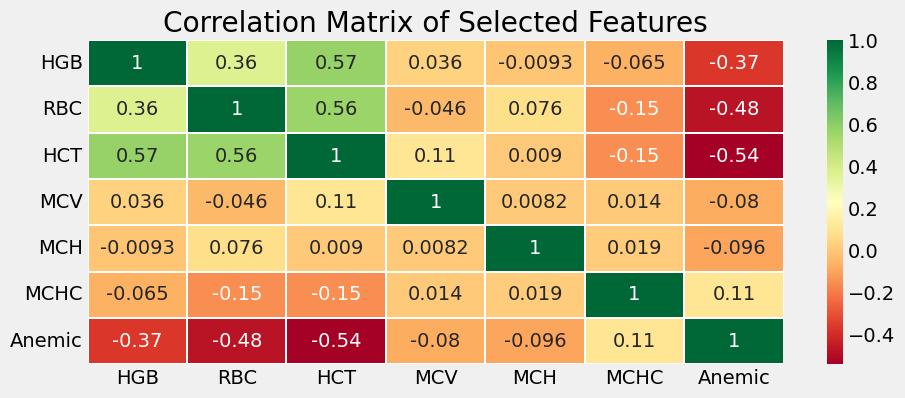

In [ ]:
selected_cols = ['HGB', 'RBC', 'HCT', 'MCV', 'MCH', 'MCHC', 'Anemic']  # Replace with your desired columns

corr_matrix = newdf[selected_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Correlation Matrix of Selected Features')  # Add a title

plt.show()

In [ ]:
d = preprocessing.normalize(newdf.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["HGB", "MCH", "MCHC", "MCV"])
scaled_df.head()

,HGB,MCH,MCHC,MCV
0,0.104257,0.069673,0.214157,0.150113
1,0.000000,0.069673,0.020199,0.039550
2,0.000000,0.069673,0.030276,0.068884
3,0.104257,0.069673,0.050975,0.180260
4,0.000000,0.069673,0.117019,0.006134


# Predictive Modelling

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

Now that we have divided our data into training and testing, we can start using various models for predictive modelling. For this specific purpose, we will create a new dataframe with desired columns

In [ ]:
selected_columns = ['Gender', 'HGB', 'MCH','MCHC','MCV','RBC','Anemic']  # Replace with your actual column names

# 2. Create the new DataFrame by selecting the columns
data = newdf[selected_columns]

Splitting the data into test and train sets

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Anemic'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Anemic']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(144, 144, 62, 62)

Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9032258064516129


Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8387096774193549


In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8387096774193549


Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.9516129032258065


K-Nearest Neighbours(KNN)


In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.9032258064516129


Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7096774193548387


Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.967741935483871


**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.863810,0.037189
Radial Svm,0.767857,0.071256
Logistic Regression,0.849048,0.057254
KNN,0.874286,0.085382
Decision Tree,0.985238,0.022558
Naive Bayes,0.800714,0.120618
Random Forest,0.975714,0.024300


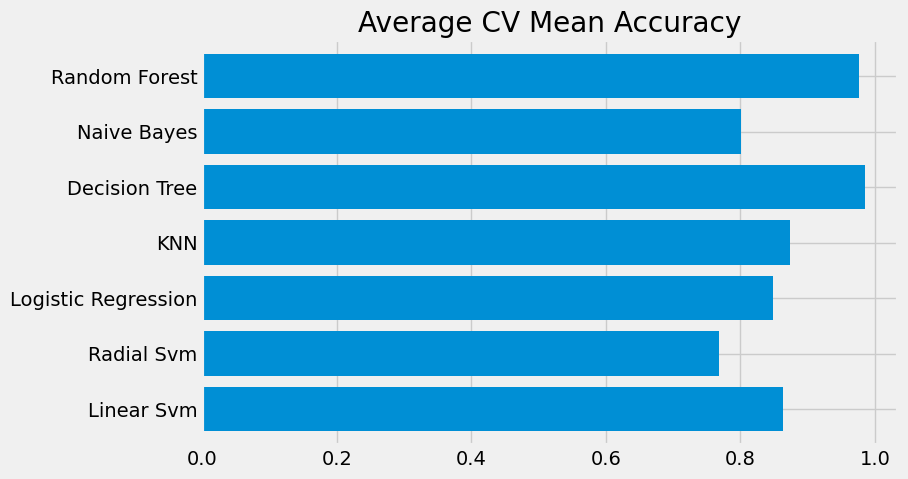

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

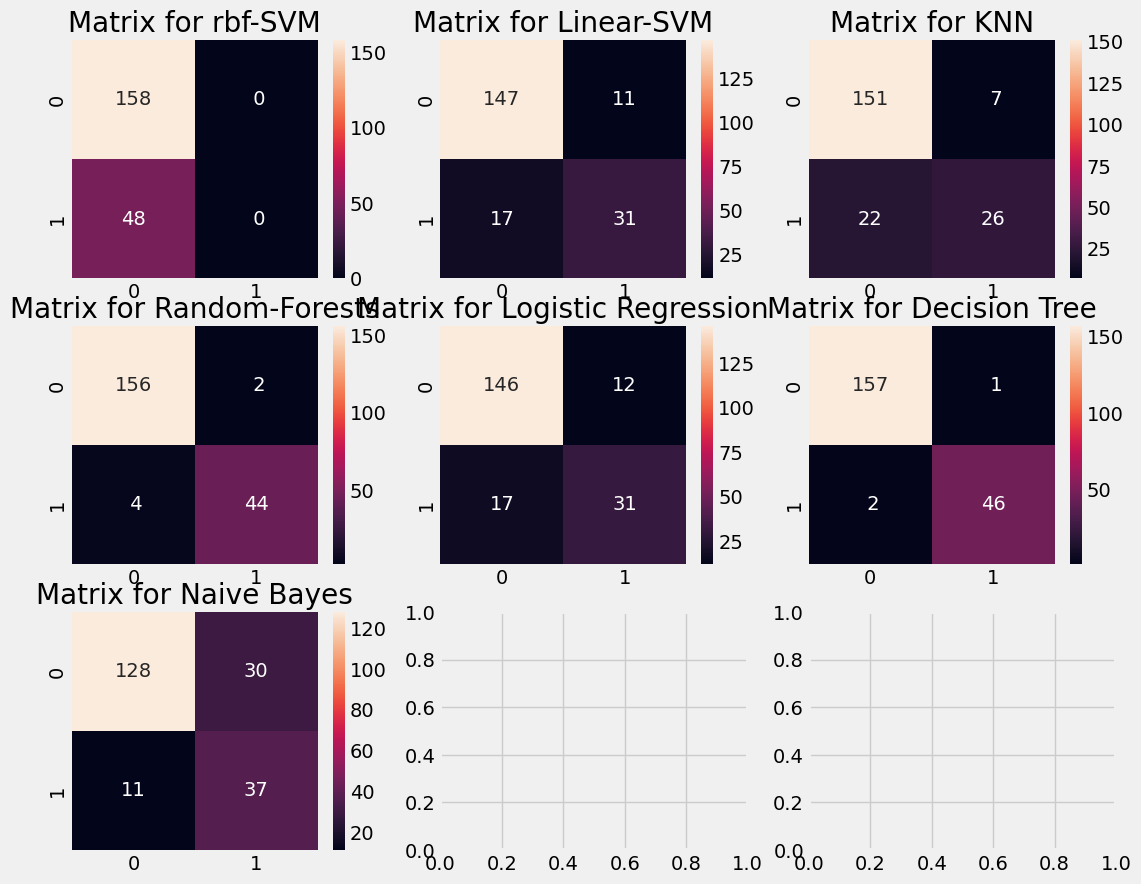

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**Ensembling**

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

The accuracy for ensembled model is: 0.9354838709677419
The cross validated score is : 0.9561904761904761


**Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.9852380952380952


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.99


***XGBOOST***

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.9854761904761904


Thus, we have finally reached an accuracy of 99% with the help of Boosting. This project not only had information of Machine Learning, but also helped us understand Anemia better. Thank you for being along the way!!!